# Author: Casey Liu & Spencer Buckner

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../Data/data_cleaned.csv')
df.head()

,Unnamed: 0,country,region,year,happiness_score,economy_(gdp_per_capita),family,health_(life_expectancy),freedom,trust_(government_corruption),generosity,dystopia_residual,food_supply_(kcal/capita/day),"crude_birth_rate_(births_per_1,000_population)",deaths_-_unsafe_water_source_per_100k_people,deaths_-_conflict_and_terrorism
0,0,Switzerland,Western Europe,2015,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,3460.0,10.364,0.030155,0.000000
1,1,Iceland,Western Europe,2015,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,3548.0,12.933,0.021300,0.000000
2,2,Denmark,Western Europe,2015,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,3315.0,10.411,0.071516,0.035288
3,3,Norway,Western Europe,2015,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,3435.0,11.397,0.065375,0.000000
4,4,Canada,North America,2015,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,3438.0,10.710,0.068045,0.000000


In [3]:
df = df.drop(columns = ['Unnamed: 0'])

In [4]:
df.head()

,country,region,year,happiness_score,economy_(gdp_per_capita),family,health_(life_expectancy),freedom,trust_(government_corruption),generosity,dystopia_residual,food_supply_(kcal/capita/day),"crude_birth_rate_(births_per_1,000_population)",deaths_-_unsafe_water_source_per_100k_people,deaths_-_conflict_and_terrorism
0,Switzerland,Western Europe,2015,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,3460.0,10.364,0.030155,0.000000
1,Iceland,Western Europe,2015,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,3548.0,12.933,0.021300,0.000000
2,Denmark,Western Europe,2015,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,3315.0,10.411,0.071516,0.035288
3,Norway,Western Europe,2015,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,3435.0,11.397,0.065375,0.000000
4,Canada,North America,2015,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,3438.0,10.710,0.068045,0.000000


In [5]:
df.dtypes

country                                            object
region                                             object
year                                                int64
happiness_score                                   float64
economy_(gdp_per_capita)                          float64
family                                            float64
health_(life_expectancy)                          float64
freedom                                           float64
trust_(government_corruption)                     float64
generosity                                        float64
dystopia_residual                                 float64
food_supply_(kcal/capita/day)                     float64
crude_birth_rate_(births_per_1,000_population)    float64
deaths_-_unsafe_water_source_per_100k_people      float64
deaths_-_conflict_and_terrorism                   float64
dtype: object

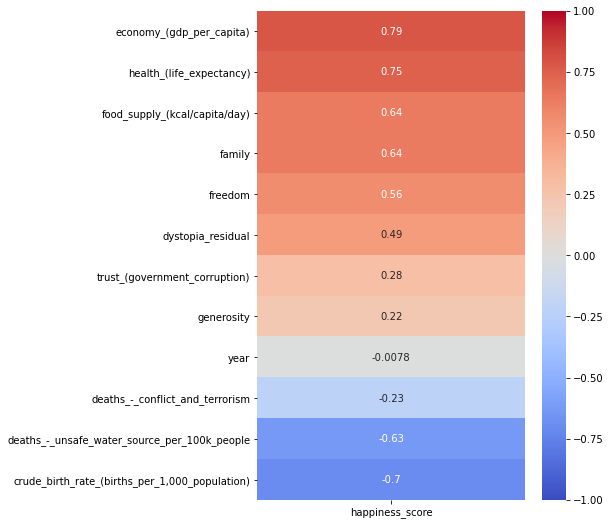

In [11]:
# Heatmap
plt.figure(figsize=(6, 9))
sns.heatmap(df.corr()[['happiness_score']].sort_values('happiness_score',ascending=False).iloc[1:],
            annot=True,
           cmap='coolwarm',
            vmin=-1,
            vmax=1)
plt.savefig('../visuals/heatmap_all.png', bbox_inches='tight');

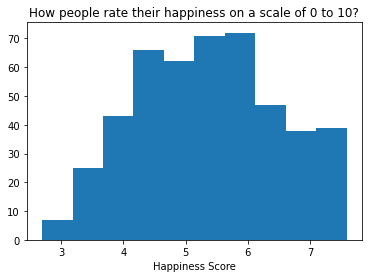

In [7]:
# Happiness score distribution
plt.hist(df['happiness_score'])
plt.title('How people rate their happiness on a scale of 0 to 10?')
plt.xlabel('Happiness Score');

In [8]:
# Happiness score by region
df.groupby('region')['happiness_score'].mean().sort_values(ascending=False)

region
Australia and New Zealand          7.302500
North America                      7.227167
Western Europe                     6.693000
Latin America and Caribbean        6.069074
Eastern Asia                       5.632333
Middle East and Northern Africa    5.387879
Central and Eastern Europe         5.371184
Southeastern Asia                  5.364077
Southern Asia                      4.590857
Sub-Saharan Africa                 4.150957
Name: happiness_score, dtype: float64

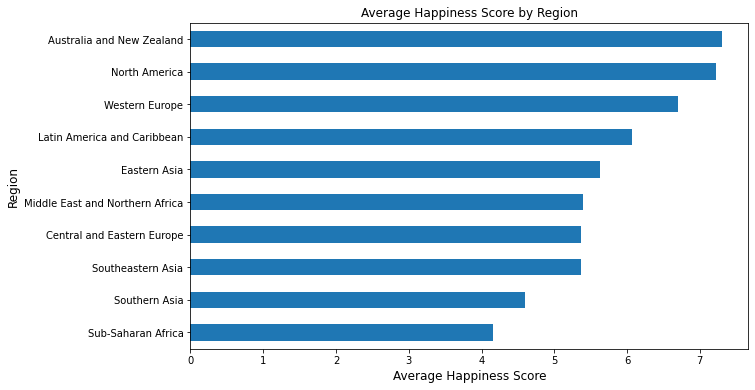

In [31]:
# Happiness score by region
df1 = df.groupby('region')['happiness_score'].mean().sort_values(ascending=False)

df1.plot(kind='barh', title='Average Happiness Score by Region', figsize=(10, 6))
plt.xlabel('Average Happiness Score', fontsize=12)
plt.ylabel('Region', fontsize=12)
plt.gca().invert_yaxis()
plt.savefig('../visuals/avg_happiness_by_region.png', bbox_inches='tight');

In [10]:
# Happiness score by country (high to low)
df.groupby('country')['happiness_score'].mean().sort_values(ascending=False).head(10)

country
Switzerland    7.530000
Denmark        7.525000
Iceland        7.522000
Norway         7.519000
Finland        7.429333
Canada         7.382333
Netherlands    7.364667
Sweden         7.313000
New Zealand    7.311333
Australia      7.293667
Name: happiness_score, dtype: float64

In [11]:
# Happiness score by country (low to high)
df.groupby('country')['happiness_score'].mean().sort_values(ascending=True).head(10)

country
Burundi                     2.905000
Syria                       3.179000
Central African Republic    3.185500
Togo                        3.212333
Rwanda                      3.483667
Benin                       3.493667
Afghanistan                 3.576333
Guinea                      3.590000
Tanzania                    3.598667
Madagascar                  3.673333
Name: happiness_score, dtype: float64

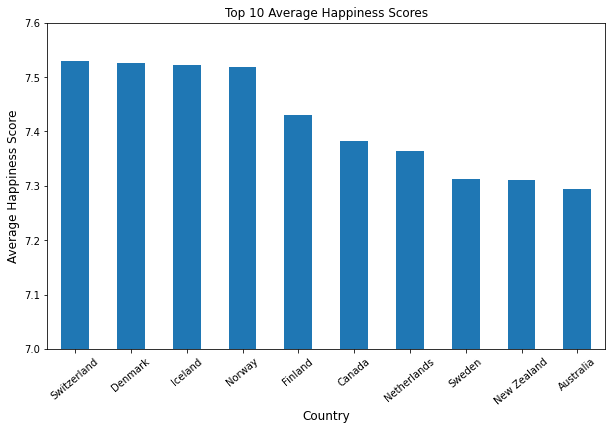

In [32]:
# Happiness score by country
df2 = df.groupby('country')['happiness_score'].mean().sort_values(ascending=False).head(10)

df2.plot(kind='bar', title='Top 10 Average Happiness Scores', figsize=(10, 6))
plt.xlabel('Country', fontsize=12)
plt.xticks(rotation=40)
plt.ylabel('Average Happiness Score', fontsize=12)
ax = plt.gca()
ax.set_ylim([7, 7.6])
plt.savefig('../visuals/top_10_by_country.png', bbox_inches='tight');

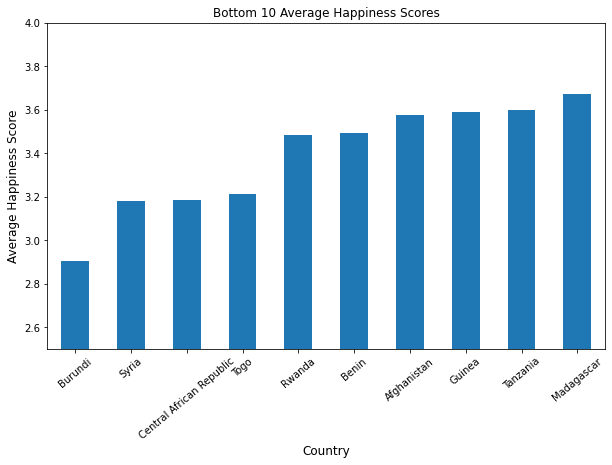

In [33]:
df3 = df.groupby('country')['happiness_score'].mean().sort_values(ascending=True).head(10)

df3.plot(kind='bar', title='Bottom 10 Average Happiness Scores', figsize=(10, 6))
plt.xlabel('Country', fontsize=12)
plt.xticks(rotation=40)
plt.ylabel('Average Happiness Score', fontsize=12)
ax = plt.gca()
ax.set_ylim([2.5, 4])
plt.savefig('../visuals/bottom_10_by_country.png', bbox_inches='tight');

In [14]:
# Happiness score by year
df.groupby('year')['happiness_score'].mean()

year
2015    5.375734
2016    5.382185
2017    5.354019
Name: happiness_score, dtype: float64

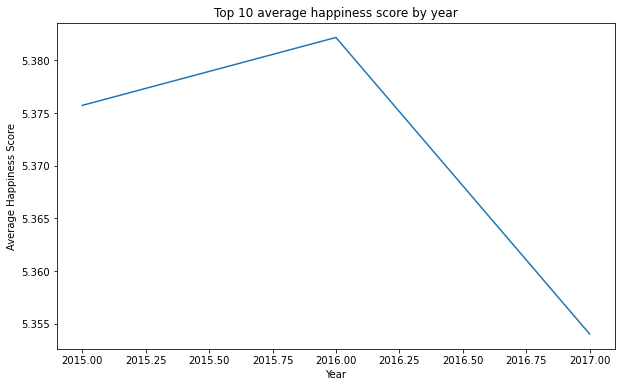

In [15]:
# Happiness score by year
df4 = df.groupby('year')['happiness_score'].mean()

df4.plot(kind='line', x='year', title='Top 10 average happiness score by year', figsize=(10, 6))
plt.xlabel('Year')
plt.ylabel('Average Happiness Score', fontsize=10);

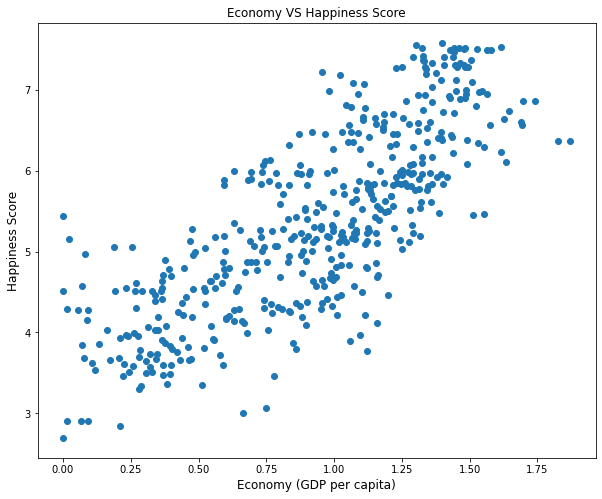

In [35]:
# Economy VS Happiness Score
plt.figure(figsize=(10, 8))
plt.scatter(df['economy_(gdp_per_capita)'], df['happiness_score'])
plt.title('Economy VS Happiness Score')
plt.xlabel('Economy (GDP per capita)', fontsize=12)
plt.ylabel('Happiness Score', fontsize=12)
plt.savefig('../visuals/economy_vs_happiness.png', bbox_inches='tight');

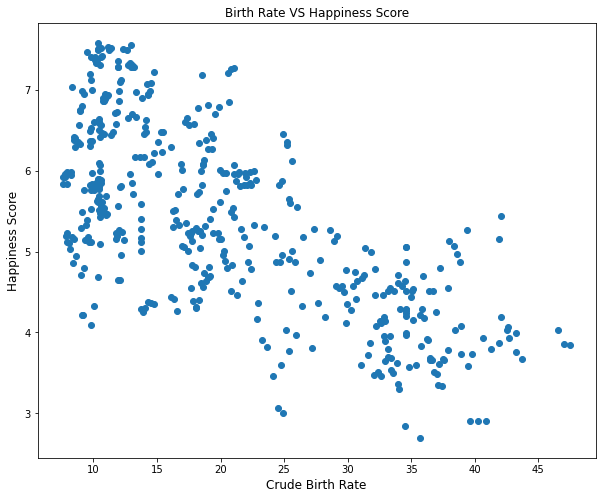

In [36]:
# Birth Rate VS Happiness Score
plt.figure(figsize=(10, 8))
plt.scatter(df['crude_birth_rate_(births_per_1,000_population)'], df['happiness_score'])
plt.title('Birth Rate VS Happiness Score', fontsize=12)
plt.xlabel('Crude Birth Rate', fontsize=12)
plt.ylabel('Happiness Score', fontsize=12)
plt.savefig('../visuals/birth_rate_vs_happiness.png', bbox_inches='tight');